In [6]:
# Step 1: Import Libraries and Load Data

# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import urllib.request

# Set visualization style
sns.set_style("whitegrid")

# Data Loading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Load the hourly data into a pandas DataFrame
# The dataset contains 'hour.csv' and 'day.csv'. I'll use the more granular hourly data.
df = pd.read_csv("hour.csv")

# Display the first 5 rows of the dataframe to confirm it's loaded correctly
print("Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

# Display information about the dataframe, including data types and non-null counts
print("\nDataFrame Info:")
df.info()

Dataset loaded successfully. Here are the first 5 rows:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

DataFrame Info:
<class 'pandas.core.frame.

In [7]:
# Step 2: Data Cleaning and Feature Engineering

# Create a copy to work on, preserving the original dataframe
df_processed = df.copy()

# 1. Renaming Columns for Clarity
df_processed.rename(columns={'dteday': 'date',
                             'yr': 'year',
                             'mnth': 'month',
                             'hr': 'hour',
                             'hum': 'humidity',
                             'cnt': 'count'}, inplace=True)

# 2. Converting Data Types
df_processed['date'] = pd.to_datetime(df_processed['date'])

# 3. Dropping Redundant and Leaky Columns
columns_to_drop = ['instant', 'date', 'atemp', 'casual', 'registered']
df_processed.drop(columns=columns_to_drop, inplace=True)


# Display Results
print("Data cleaning and preparation complete. Here are the first 5 rows of the processed data:")
print(df_processed.head())

print("\nProcessed DataFrame Info:")
df_processed.info()


Data cleaning and preparation complete. Here are the first 5 rows of the processed data:
   season  year  month  hour  holiday  weekday  workingday  weathersit  temp  \
0       1     0      1     0        0        6           0           1  0.24   
1       1     0      1     1        0        6           0           1  0.22   
2       1     0      1     2        0        6           0           1  0.22   
3       1     0      1     3        0        6           0           1  0.24   
4       1     0      1     4        0        6           0           1  0.24   

   humidity  windspeed  count  
0      0.81        0.0     16  
1      0.80        0.0     40  
2      0.80        0.0     32  
3      0.75        0.0     13  
4      0.75        0.0      1  

Processed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      173

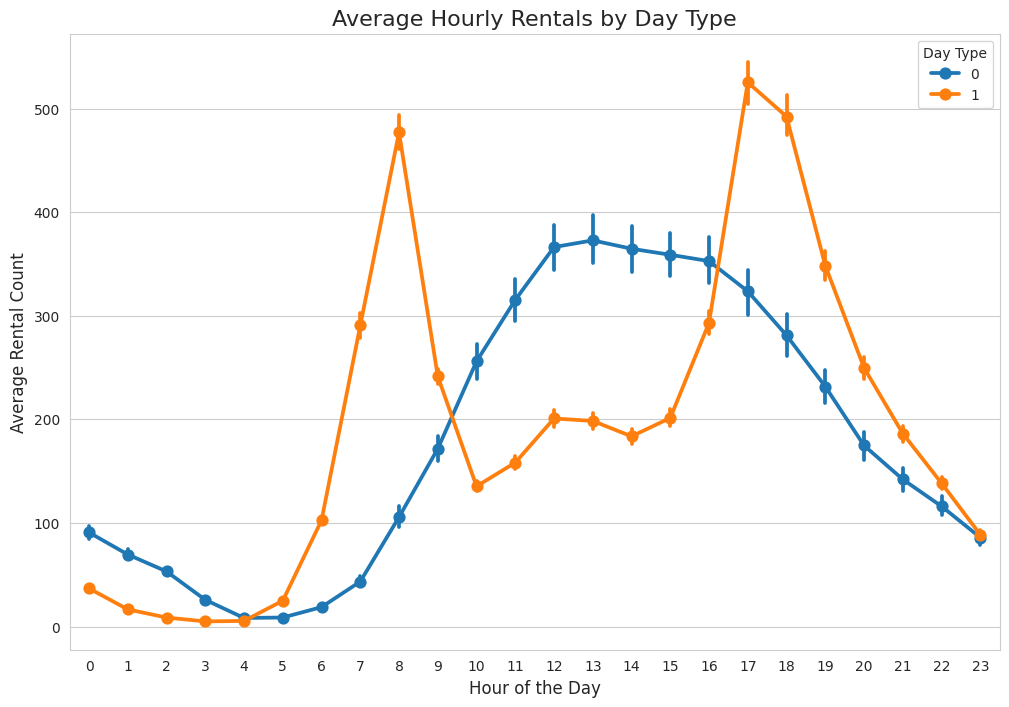

In [17]:
# Step 3.1: Plot Average Hourly Demand

plt.figure(figsize=(12, 8))
ax = sns.pointplot(data=df_processed, x='hour', y='count', hue='workingday')

# Set titles and labels
ax.set_title('Average Hourly Rentals by Day Type', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Average Rental Count', fontsize=12)

# Create a clear legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Day Type')

plt.show()

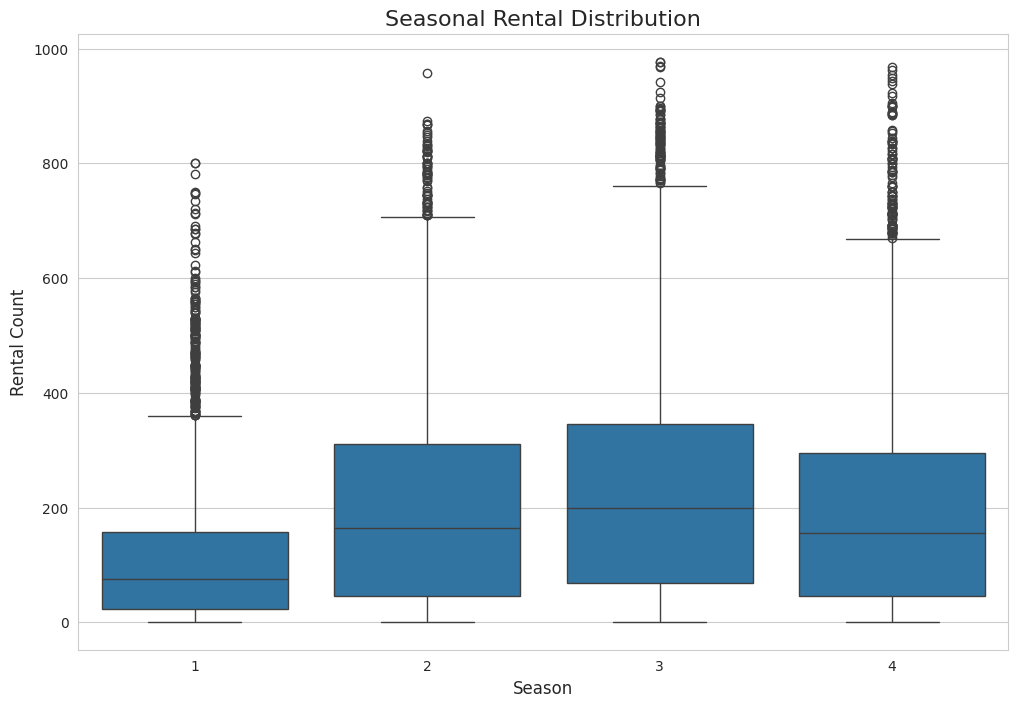

In [18]:
# Step 3.2: Plot Seasonal Rental Distribution

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_processed, x='season', y='count')

# Set titles and labels
ax.set_title('Seasonal Rental Distribution', fontsize=16)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Rental Count', fontsize=12)

plt.show()

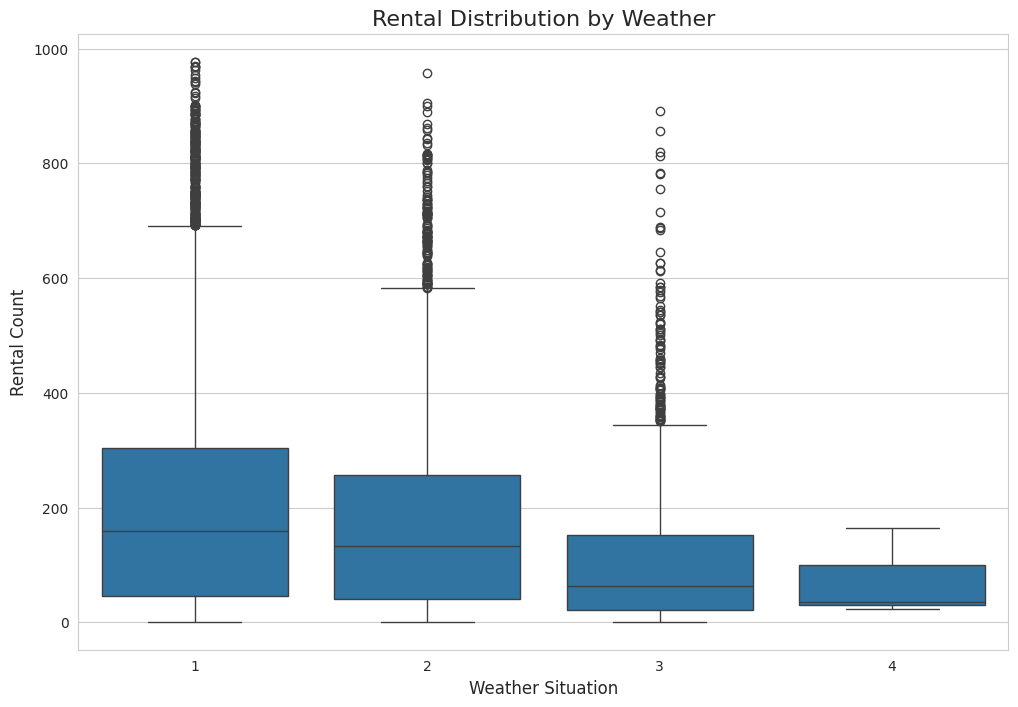

In [19]:
# Step 3.3: Plot Rental Distribution by Weather

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_processed, x='weathersit', y='count')

# Set titles and labels
ax.set_title('Rental Distribution by Weather', fontsize=16)
ax.set_xlabel('Weather Situation', fontsize=12)
ax.set_ylabel('Rental Count', fontsize=12)


plt.show()

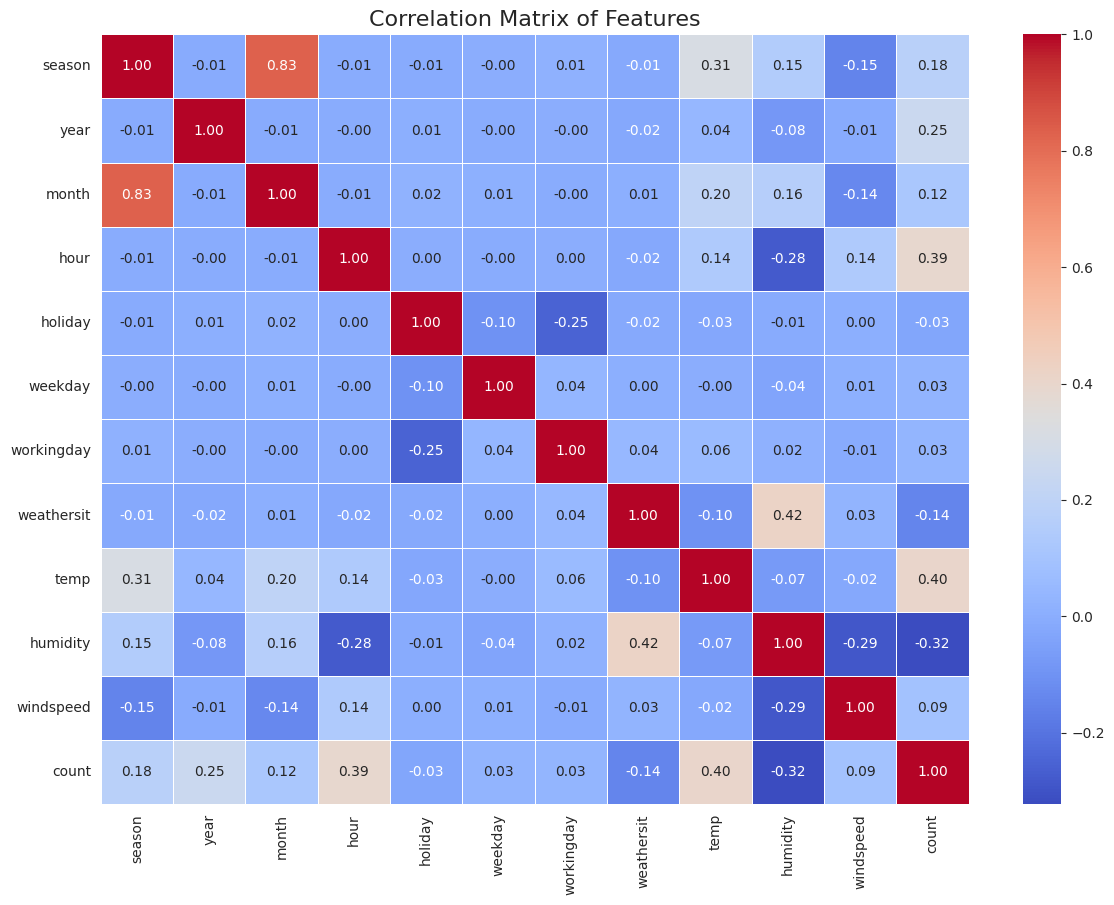


Correlation of each feature with 'count':
count         1.000000
temp          0.404772
hour          0.394071
year          0.250495
season        0.178056
month         0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
humidity     -0.322911
Name: count, dtype: float64


In [20]:
# Step 3.4: Plot Feature Correlation Heatmap

# Calculate the correlation matrix
correlation_matrix = df_processed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

# For clarity, also print the correlations with the target variable 'count'
print("\nCorrelation of each feature with 'count':")
print(correlation_matrix['count'].sort_values(ascending=False))

In [12]:
# Step 4: Prepare Data for Modeling (Train-Test Split)

# Import the function for splitting data from scikit-learn
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
# X contains all the columns I will use to make predictions.
# I drop the 'count' column because that's what I'm trying to predict.
X = df_processed.drop('count', axis=1)

# y is the target column I want our model to predict.
y = df_processed['count']

# 2. Split the data into training and testing sets
# I'll use 80% of the data for training and 20% for testing (test_size=0.2).
# random_state=42 ensures that I get the same split every time I run this code,
# which is important for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Print the shapes of the resulting datasets to confirm the split
print("Shape of the training features (X_train):", X_train.shape)
print("Shape of the testing features (X_test):", X_test.shape)
print("Shape of the training target (y_train):", y_train.shape)
print("Shape of the testing target (y_test):", y_test.shape)

Shape of the training features (X_train): (13903, 11)
Shape of the testing features (X_test): (3476, 11)
Shape of the training target (y_train): (13903,)
Shape of the testing target (y_test): (3476,)


In [14]:
# Step 5: Train the Extra Trees Regressor Model

# Import the ExtraTreesRegressor from scikit-learn's ensemble module
from sklearn.ensemble import ExtraTreesRegressor

# 1. Initialize the ExtraTreesRegressor model
# n_estimators=100 means the model will build a forest of 100 trees.
# random_state=42 ensures reproducibility.
# n_jobs=-1 tells the model to use all available CPU cores to speed up training.
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Fit the model to the training data
# This is the step where the model learns from the data.
print("Training the Extra Trees Regressor model...")
et_regressor.fit(X_train, y_train)
print("Model training complete.")

Training the Extra Trees Regressor model...
Model training complete.


Making predictions on the test set...
Predictions complete.

Model Performance Metrics:
R-squared (R²): 0.9477
Mean Absolute Error (MAE): 24.11
Mean Squared Error (MSE): 1654.68
Root Mean Squared Error (RMSE): 40.68


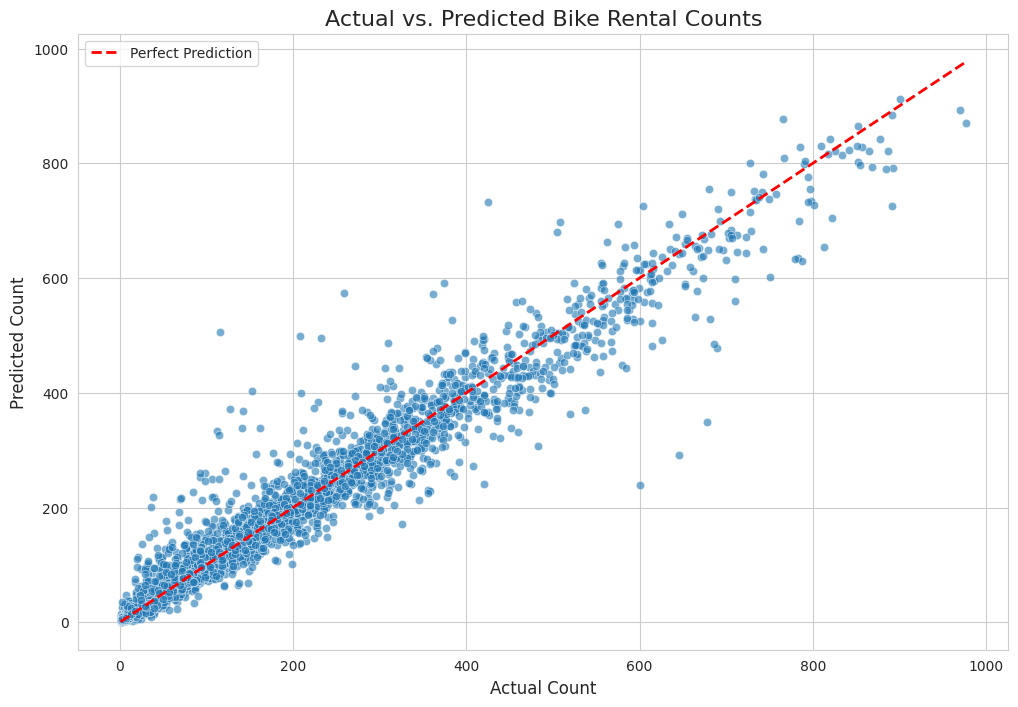

In [21]:
# Step 6: Evaluate Model Performance

# Import metrics and plotting libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Make predictions on the test data
print("Making predictions on the test set...")
y_pred = et_regressor.predict(X_test)
print("Predictions complete.")

# 2. Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("\nModel Performance Metrics:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 3. Visualize the predictions vs. actual values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Bike Rental Counts', fontsize=16)
plt.xlabel('Actual Count', fontsize=12)
plt.ylabel('Predicted Count', fontsize=12)
plt.legend()
plt.show()

Feature Importances (from most to least important):
       feature  importance
3         hour    0.562319
8         temp    0.115334
6   workingday    0.087194
1         year    0.078721
0       season    0.043641
9     humidity    0.037688
7   weathersit    0.023067
2        month    0.022912
5      weekday    0.014189
10   windspeed    0.011422
4      holiday    0.003514


/tmp/ipython-input-1626048807.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


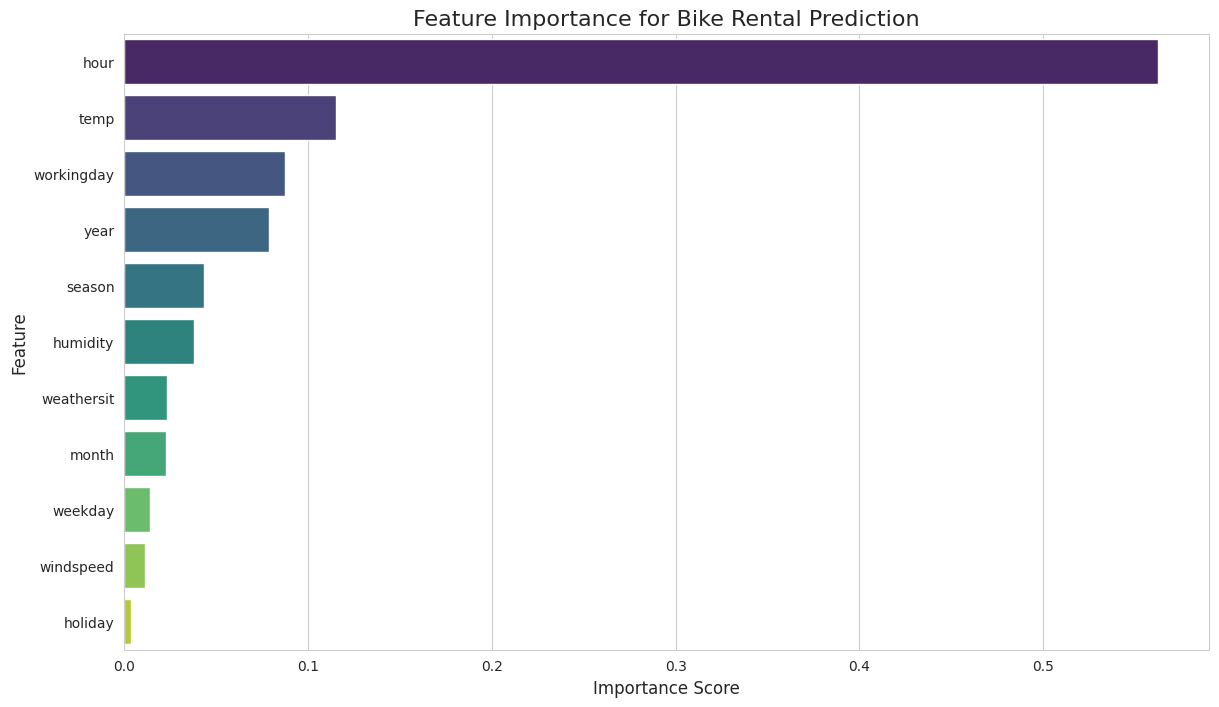

In [16]:
# Step 7: Feature Importance Analysis

# 1. Get feature importances from the trained model
importances = et_regressor.feature_importances_

# 2. Create a pandas DataFrame for easier visualization
# I'll match the importance scores with their corresponding feature names from X_train
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# 3. Print the feature importances
print("Feature Importances (from most to least important):")
print(feature_importance_df)

# 4. Plot the feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')

plt.title('Feature Importance for Bike Rental Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()